In [1]:
#import libraries
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
a = pd.read_csv('Answers.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body'], low_memory=False)
q = pd.read_csv('Questions.csv', usecols = ['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body'], low_memory=False)
t = pd.read_csv('Tags.csv', usecols = ['Id', 'Tag'], low_memory=False)

q_clean = q
q_clean = q_clean[q_clean['Id'].str.contains('\D') == False]
q_clean['Id'] = q_clean['Id'].astype(str).astype(int)
q_clean = q_clean[q_clean['Score'].str.contains('\D') == False]
q_clean['Score'] = q_clean['Score'].astype(str).astype(int)
q_clean.drop(["OwnerUserId"], axis=1, inplace=True)
q_clean['Body'] = q_clean['Title'].astype(str) +" "+ q_clean['Body'].astype(str)
q_clean.drop(['Title'], axis=1)

a_clean = a
a_clean.drop(["Id", "OwnerUserId"], axis=1, inplace=True)
a_clean.rename(columns={'ParentId' : 'Id'}, inplace=True)

In [3]:
cpp_tags_list = ['boost', 'poco', 'googletest', 'tbb', 'wtl',
                 'stdvector', 'stdstring', 'stdlist', 'opencv', 
                 'ffmpeg', 'openssl', 'sqlite', 'opencv']
java_tags_list = ['guava', 'apache', 'jms', 'gson', 'log4j', 'junit', 
                 'spring', 'jmx', 'jaxb', 'httpclient']
python_tags_list = ['django', 'pybrain',  'scipy', 'scrapy',  'pygame', 
                    'matplotlib', 'pandas', 'numpy']

cpp_pattern = '|'.join(cpp_tags_list)
java_pattern = '|'.join(java_tags_list)
python_pattern = '|'.join(python_tags_list)

cpp_ids = t[t['Tag'].astype(str).str.contains(cpp_pattern, case=False)]
java_ids = t[t['Tag'].astype(str).str.contains(java_pattern, case=False)]
python_ids = t[t['Tag'].astype(str).str.contains(python_pattern, case=False)]

In [4]:
questions_java = pd.merge(java_ids, q_clean, how='inner', on=['Id'])
answers_java = pd.merge(java_ids, a_clean, how='inner', on=['Id'])

questions_python = pd.merge(python_ids, q_clean, how='inner', on=['Id'])
answers_python = pd.merge(python_ids, a_clean, how='inner', on=['Id'])


questions_cpp = pd.merge(cpp_ids, q_clean, how='inner', on=['Id'])
answers_cpp = pd.merge(cpp_ids, a_clean, how='inner', on=['Id'])


In [5]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

questions_java['sentiment'] = questions_java['Body'].apply(get_sentiment)
answers_java['sentiment'] = answers_java['Body'].apply(get_sentiment)

questions_python['sentiment'] = questions_python['Body'].apply(get_sentiment)
answers_python['sentiment'] = answers_python['Body'].apply(get_sentiment)

questions_cpp['sentiment'] = questions_cpp['Body'].apply(get_sentiment)
answers_cpp['sentiment'] = answers_cpp['Body'].apply(get_sentiment)

In [6]:
#C++
cpp_q = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in cpp_tags_list:
    for num in questions_cpp.index:
        tag = questions_cpp['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Body':questions_cpp['Body'][num], 'sentiment':(questions_cpp['sentiment'][num]*(questions_cpp['Score'][num]+1))}
            cpp_q.loc[len(cpp_q)] = new_row
            questions_cpp.drop(index=num, inplace=True)
print(cpp_q)
cpp_a = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in cpp_tags_list:
    for num in answers_cpp.index:
        tag = answers_cpp['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Body':answers_cpp['Body'][num], 'sentiment':(answers_cpp['sentiment'][num]*(answers_cpp['Score'][num]+1))}
            cpp_a.loc[len(cpp_a)] = new_row
            answers_cpp.drop(index=num, inplace=True)

#Java
java_q = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in java_tags_list:
    for num in questions_java.index:
        tag = questions_java['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t,'Body':questions_java['Body'][num], 'sentiment':(questions_java['sentiment'][num]*(questions_java['Score'][num]+1))}
            java_q.loc[len(java_q)] = new_row
            questions_java.drop(index=num, inplace=True)
java_a = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in java_tags_list:
    for num in answers_java.index:
        tag = answers_java['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Body':answers_java['Body'][num], 'sentiment':(answers_java['sentiment'][num]*(answers_java['Score'][num]+1))}
            java_a.loc[len(java_a)] = new_row
            answers_java.drop(index=num, inplace=True)

#python
python_q = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in python_tags_list:
    for num in questions_python.index:
        tag = questions_python['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Body':questions_python['Body'][num], 'sentiment':(questions_python['sentiment'][num]*(questions_python['Score'][num]+1))}
            python_q.loc[len(python_q)] = new_row
            questions_python.drop(index=num, inplace=True)
            
python_a = pd.DataFrame(columns=['Tag', 'Body', 'sentiment'])
for t in python_tags_list:
    for num in answers_python.index:
        tag = answers_python['Tag'][num]
        if t in tag:
            new_row = {'Tag' : t, 'Body':answers_python['Body'][num], 'sentiment':(answers_python['sentiment'][num]*(answers_python['Score'][num]+1))}
            python_a.loc[len(python_a)] = new_row
            answers_python.drop(index=num, inplace=True)

         Tag                                               Body  sentiment
0      boost  Exceptions not passed correctly thru RCF (usin...   0.618750
1      boost  Boost serialization: specifying a template cla...   0.000000
2      boost  What are the advantages of using the C++ Boost...  85.000000
3      boost  Why do thread functions need to be declared as...   1.000000
4      boost  Boost like libraries in C <p>Can you recommend...   3.410714
...      ...                                                ...        ...
4419  sqlite  Passing Context to SQLiteOpenHelper <p>First u...   0.282879
4420  sqlite  NullPointerException when insert and Data Retr...   0.132836
4421  sqlite  Not able to add new record to sqlite database ...   0.399667
4422  sqlite  Not able to add new record to sqlite database ...   0.399667
4423  sqlite  Getting iPhone Documents Directory in TestCase...  -0.053571

[4424 rows x 3 columns]


In [7]:
cpp = pd.concat([cpp_a, cpp_q], ignore_index=True)
py = pd.concat([python_a, python_q], ignore_index=True)
java = pd.concat([java_a, java_q], ignore_index=True)

In [8]:
from matplotlib import pyplot as plt

C++: Sentiment by Library


array([[<Axes: title={'center': 'boost'}>,
        <Axes: title={'center': 'ffmpeg'}>,
        <Axes: title={'center': 'googletest'}>],
       [<Axes: title={'center': 'opencv'}>,
        <Axes: title={'center': 'openssl'}>,
        <Axes: title={'center': 'poco'}>],
       [<Axes: title={'center': 'sqlite'}>,
        <Axes: title={'center': 'stdlist'}>,
        <Axes: title={'center': 'stdstring'}>],
       [<Axes: title={'center': 'stdvector'}>,
        <Axes: title={'center': 'tbb'}>, <Axes: title={'center': 'wtl'}>]],
      dtype=object)

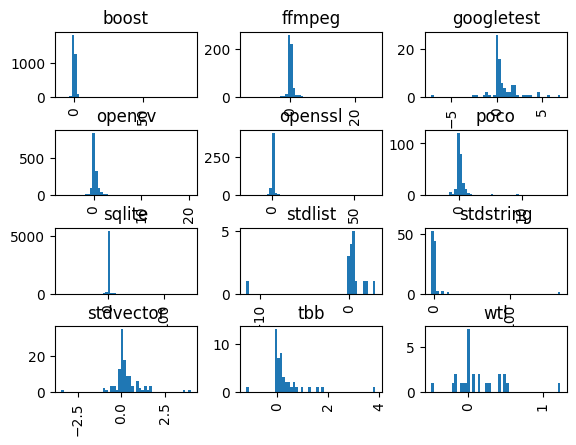

In [9]:
print("C++: Sentiment by Library")
cpp["sentiment"].hist(by=cpp["Tag"], bins = 50)

Python: Sentiment by Library


array([[<Axes: title={'center': 'django'}>,
        <Axes: title={'center': 'matplotlib'}>,
        <Axes: title={'center': 'numpy'}>],
       [<Axes: title={'center': 'pandas'}>,
        <Axes: title={'center': 'pybrain'}>,
        <Axes: title={'center': 'pygame'}>],
       [<Axes: title={'center': 'scipy'}>,
        <Axes: title={'center': 'scrapy'}>, <Axes: >]], dtype=object)

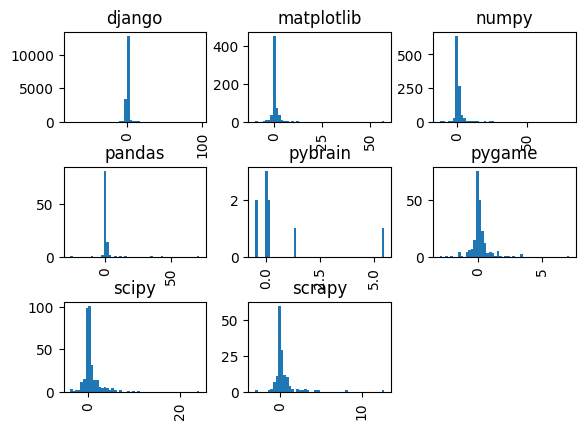

In [10]:
print("Python: Sentiment by Library")
py["sentiment"].hist(by=py["Tag"], bins = 50)

Java: Sentiment by Library


array([[<Axes: title={'center': 'apache'}>,
        <Axes: title={'center': 'gson'}>,
        <Axes: title={'center': 'guava'}>],
       [<Axes: title={'center': 'httpclient'}>,
        <Axes: title={'center': 'jaxb'}>,
        <Axes: title={'center': 'jms'}>],
       [<Axes: title={'center': 'jmx'}>,
        <Axes: title={'center': 'junit'}>,
        <Axes: title={'center': 'log4j'}>],
       [<Axes: title={'center': 'spring'}>, <Axes: >, <Axes: >]],
      dtype=object)

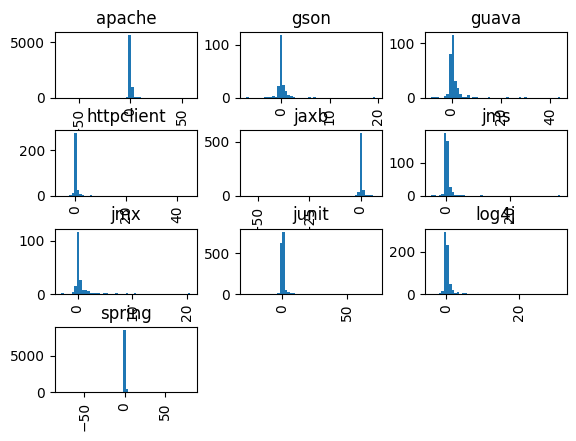

In [11]:
print("Java: Sentiment by Library")
java["sentiment"].hist(by=java["Tag"], bins = 50)

In [12]:
print(cpp.groupby("Tag")['sentiment'].sum())
print(cpp.groupby("Tag")['sentiment'].mean())

Tag
boost         1365.064808
ffmpeg         233.926389
googletest      56.646854
opencv         511.517525
openssl        156.738549
poco           104.605695
sqlite        1945.867639
stdlist         -0.458345
stdstring      231.993938
stdvector       32.345141
tbb             15.103117
wtl              3.344964
Name: sentiment, dtype: float64
Tag
boost         0.416432
ffmpeg        0.395815
googletest    0.682492
opencv        0.343531
openssl       0.317928
poco          0.374931
sqlite        0.342161
stdlist      -0.026961
stdstring     2.274450
stdvector     0.278837
tbb           0.335625
wtl           0.128652
Name: sentiment, dtype: float64


In [13]:
print(py.groupby("Tag")['sentiment'].sum())
print(py.groupby("Tag")['sentiment'].mean())

Tag
django        6182.088868
matplotlib     356.046085
numpy         1045.689917
pandas         180.413548
pybrain          6.323062
pygame          31.922226
scipy          215.223671
scrapy          61.096955
Name: sentiment, dtype: float64
Tag
django        0.368398
matplotlib    0.560702
numpy         0.983716
pandas        1.686108
pybrain       0.702562
pygame        0.142510
scipy         0.662227
scrapy        0.407313
Name: sentiment, dtype: float64


In [14]:
print(java.groupby("Tag")['sentiment'].sum())
print(java.groupby("Tag")['sentiment'].mean())

Tag
apache        2084.412620
gson            50.369854
guava          337.353805
httpclient     225.717697
jaxb            97.311636
jms            153.074462
jmx            113.269419
junit          752.958908
log4j          340.002247
spring        2974.259896
Name: sentiment, dtype: float64
Tag
apache        0.309490
gson          0.254393
guava         1.217884
httpclient    0.677831
jaxb          0.142061
jms           0.375183
jmx           0.580869
junit         0.497660
log4j         0.520677
spring        0.328321
Name: sentiment, dtype: float64


<Axes: xlabel='sentiment', ylabel='Tag'>

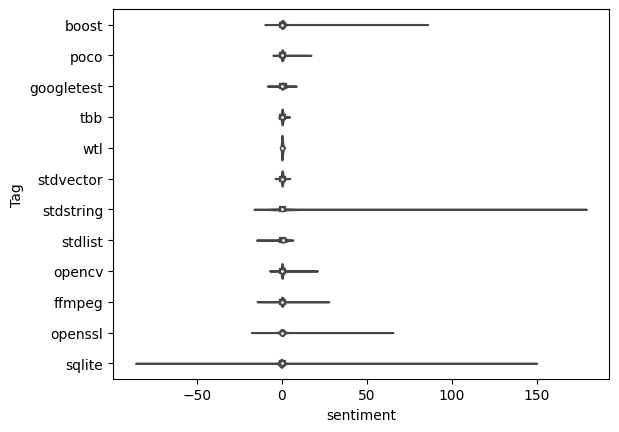

In [15]:
import seaborn as sns
sns.violinplot(data=cpp, x='sentiment', y='Tag')

<Axes: xlabel='sentiment', ylabel='Tag'>

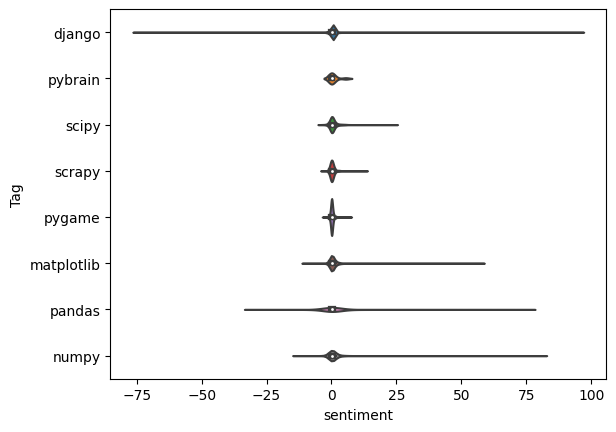

In [16]:
sns.violinplot(data=py, x='sentiment', y='Tag')

<Axes: xlabel='sentiment', ylabel='Tag'>

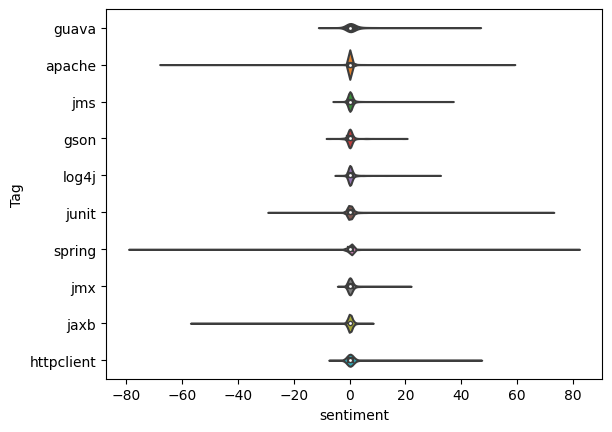

In [17]:
sns.violinplot(data=java, x='sentiment', y='Tag')